In [11]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import boxcox
from precision_recall_cutoff import precision_recall_cutoff

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import recall_score, classification_report

## define bucket in which you are trying to reach
s3 = boto3.resource('s3')
bucket_name = 'daltondencklau-data445-bucket'
bucket = s3.Bucket(bucket_name)

## define csv file to read in the bucket
file_key= 'turnover.csv'

## syntax to allow us to read the file
bucket_object = bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## reading the data file
turnover = pd.read_csv(file_content_stream)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
## changing 'sales' and 'salary' to dummy variables
turnover = pd.concat([turnover.drop(columns = ['sales', 'salary'], axis = 1), pd.get_dummies(turnover[['sales', 'salary']])], axis = 1)
turnover.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.478\nsamples = 3353\nvalue = [1324, 2029]'),
 Text(0.125, 0.375, 'average_montly_hours <= 162.0\ngini = 0.207\nsamples = 1409\nvalue = [165, 1244]'),
 Text(0.0625, 0.125, 'gini = 0.1\nsamples = 1306\nvalue = [69, 1237]'),
 Text(0.1875, 0.125, 'gini = 0.127\nsamples = 103\nvalue = [96, 7]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.481\nsamples = 1944\nvalue = [1159, 785]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 701\nvalue = [0, 701]'),
 Text(0.4375, 0.125, 'gini = 0.126\nsamples = 1243\nvalue = [1159, 84]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.173\nsamples = 8646\nvalue = [7818, 828]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.0\ngini = 0.029\nsamples = 7056\nvalue = [6951, 105]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 7048\nvalue = [6951, 97]'),
 Text(0.6875, 0.125, 'gini =

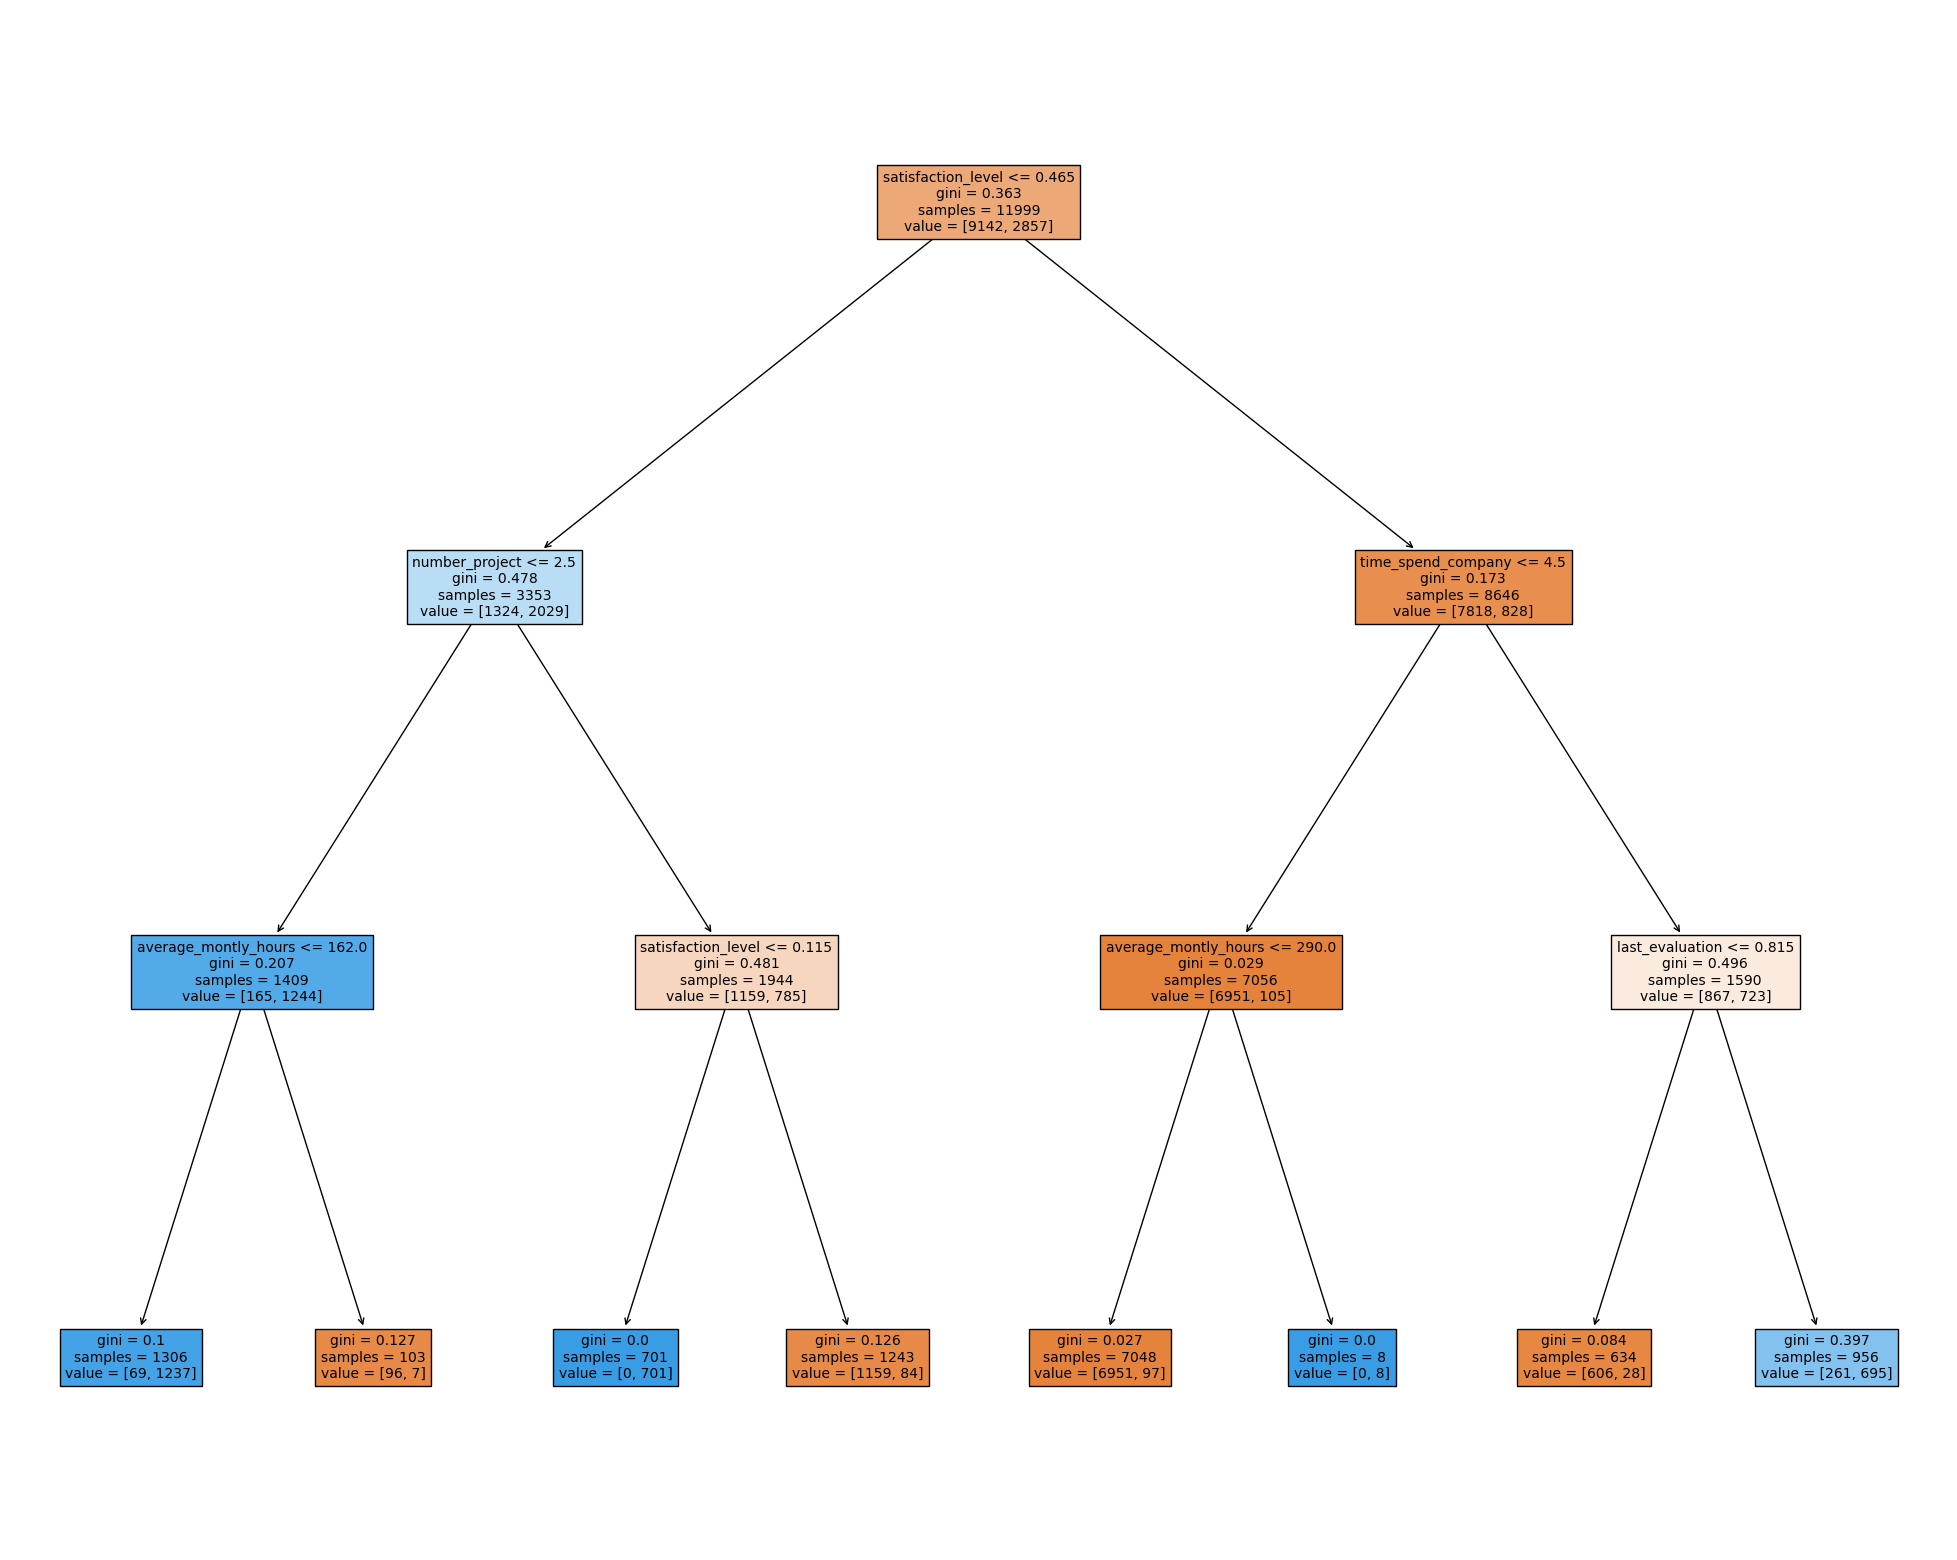

In [13]:
## defining input and target variables
x = turnover.drop(columns = ['left'], axis = 1)
y = turnover['left']

## splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

## building Decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)

## plotting the decision tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = x_train.columns, filled = True)

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.48\nsamples = 3378\nvalue = [1354, 2024]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.226\nsamples = 1414\nvalue = [184, 1230]'),
 Text(0.0625, 0.125, 'gini = 0.111\nsamples = 1301\nvalue = [77, 1224]'),
 Text(0.1875, 0.125, 'gini = 0.101\nsamples = 113\nvalue = [107, 6]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.482\nsamples = 1964\nvalue = [1170, 794]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 706\nvalue = [0, 706]'),
 Text(0.4375, 0.125, 'gini = 0.13\nsamples = 1258\nvalue = [1170, 88]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.175\nsamples = 8621\nvalue = [7788, 833]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.03\nsamples = 7057\nvalue = [6950, 107]'),
 Text(0.5625, 0.125, 'gini = 0.029\nsamples = 7052\nvalue = [6950, 102]'),
 Text(0.6875, 0.125, 'gini = 0.0

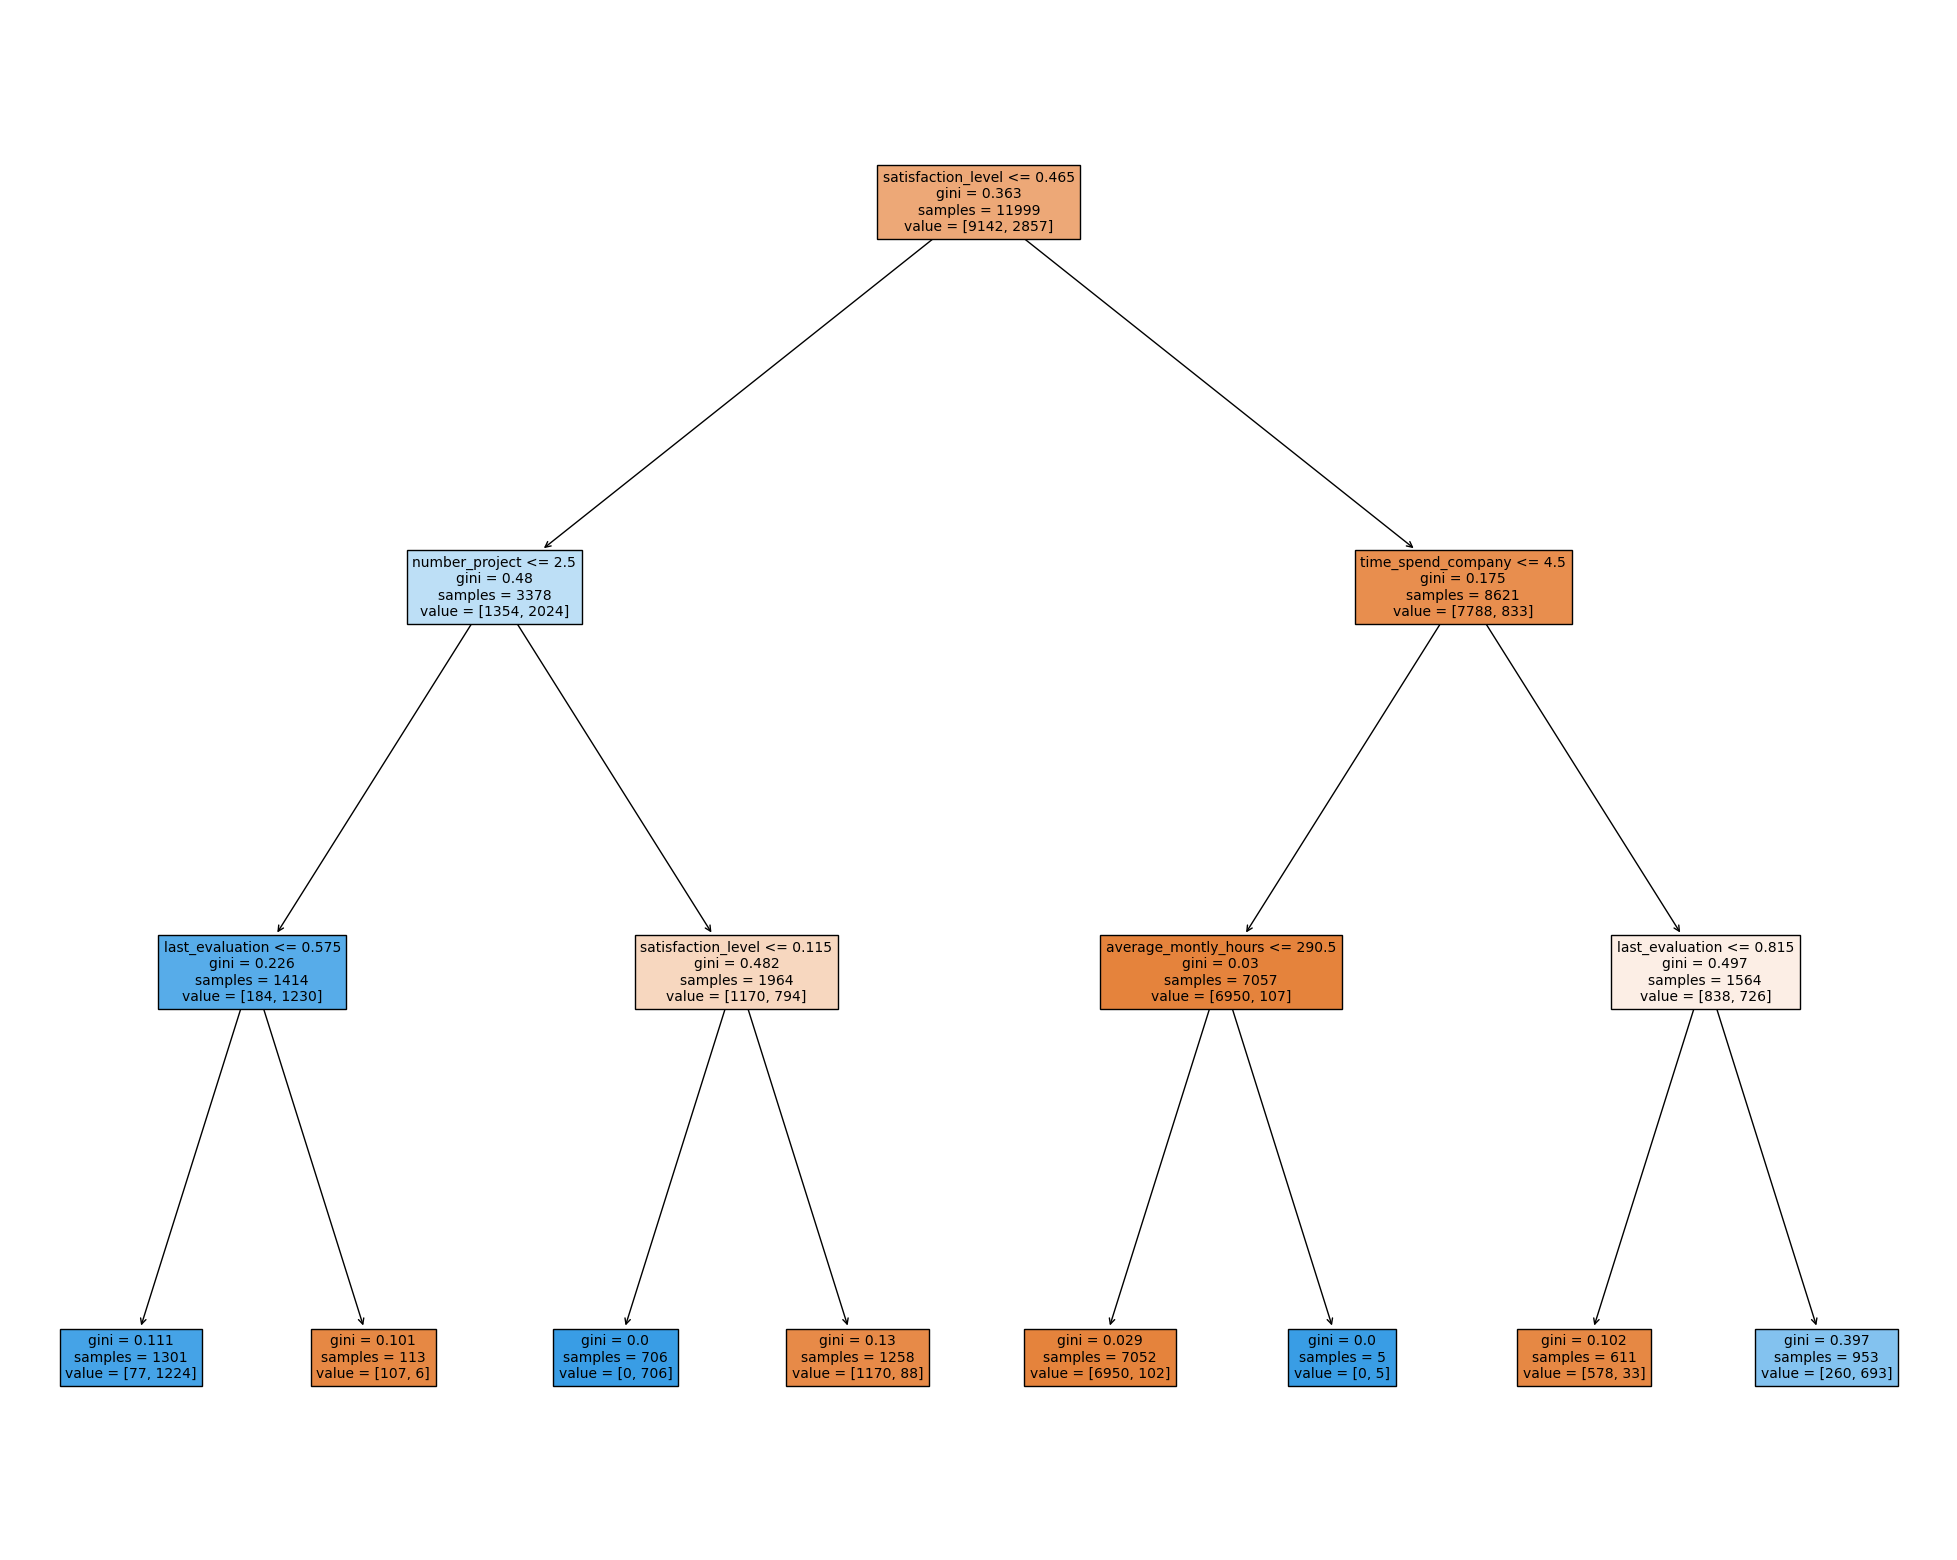

In [14]:
## defining input and target variables
x = turnover.drop(columns = ['left'], axis = 1)
y = turnover['left']

## splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

## building Decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)

## plotting the decision tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = x_train.columns, filled = True)

[Text(0.5, 0.875, 'satisfaction_level <= 0.465\ngini = 0.363\nsamples = 11999\nvalue = [9142, 2857]'),
 Text(0.25, 0.625, 'number_project <= 2.5\ngini = 0.477\nsamples = 3329\nvalue = [1306, 2023]'),
 Text(0.125, 0.375, 'last_evaluation <= 0.575\ngini = 0.22\nsamples = 1370\nvalue = [172, 1198]'),
 Text(0.0625, 0.125, 'gini = 0.101\nsamples = 1260\nvalue = [67, 1193]'),
 Text(0.1875, 0.125, 'gini = 0.087\nsamples = 110\nvalue = [105, 5]'),
 Text(0.375, 0.375, 'satisfaction_level <= 0.115\ngini = 0.488\nsamples = 1959\nvalue = [1134, 825]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 734\nvalue = [0, 734]'),
 Text(0.4375, 0.125, 'gini = 0.138\nsamples = 1225\nvalue = [1134, 91]'),
 Text(0.75, 0.625, 'time_spend_company <= 4.5\ngini = 0.174\nsamples = 8670\nvalue = [7836, 834]'),
 Text(0.625, 0.375, 'average_montly_hours <= 290.5\ngini = 0.029\nsamples = 7098\nvalue = [6993, 105]'),
 Text(0.5625, 0.125, 'gini = 0.027\nsamples = 7089\nvalue = [6993, 96]'),
 Text(0.6875, 0.125, 'gini = 0.

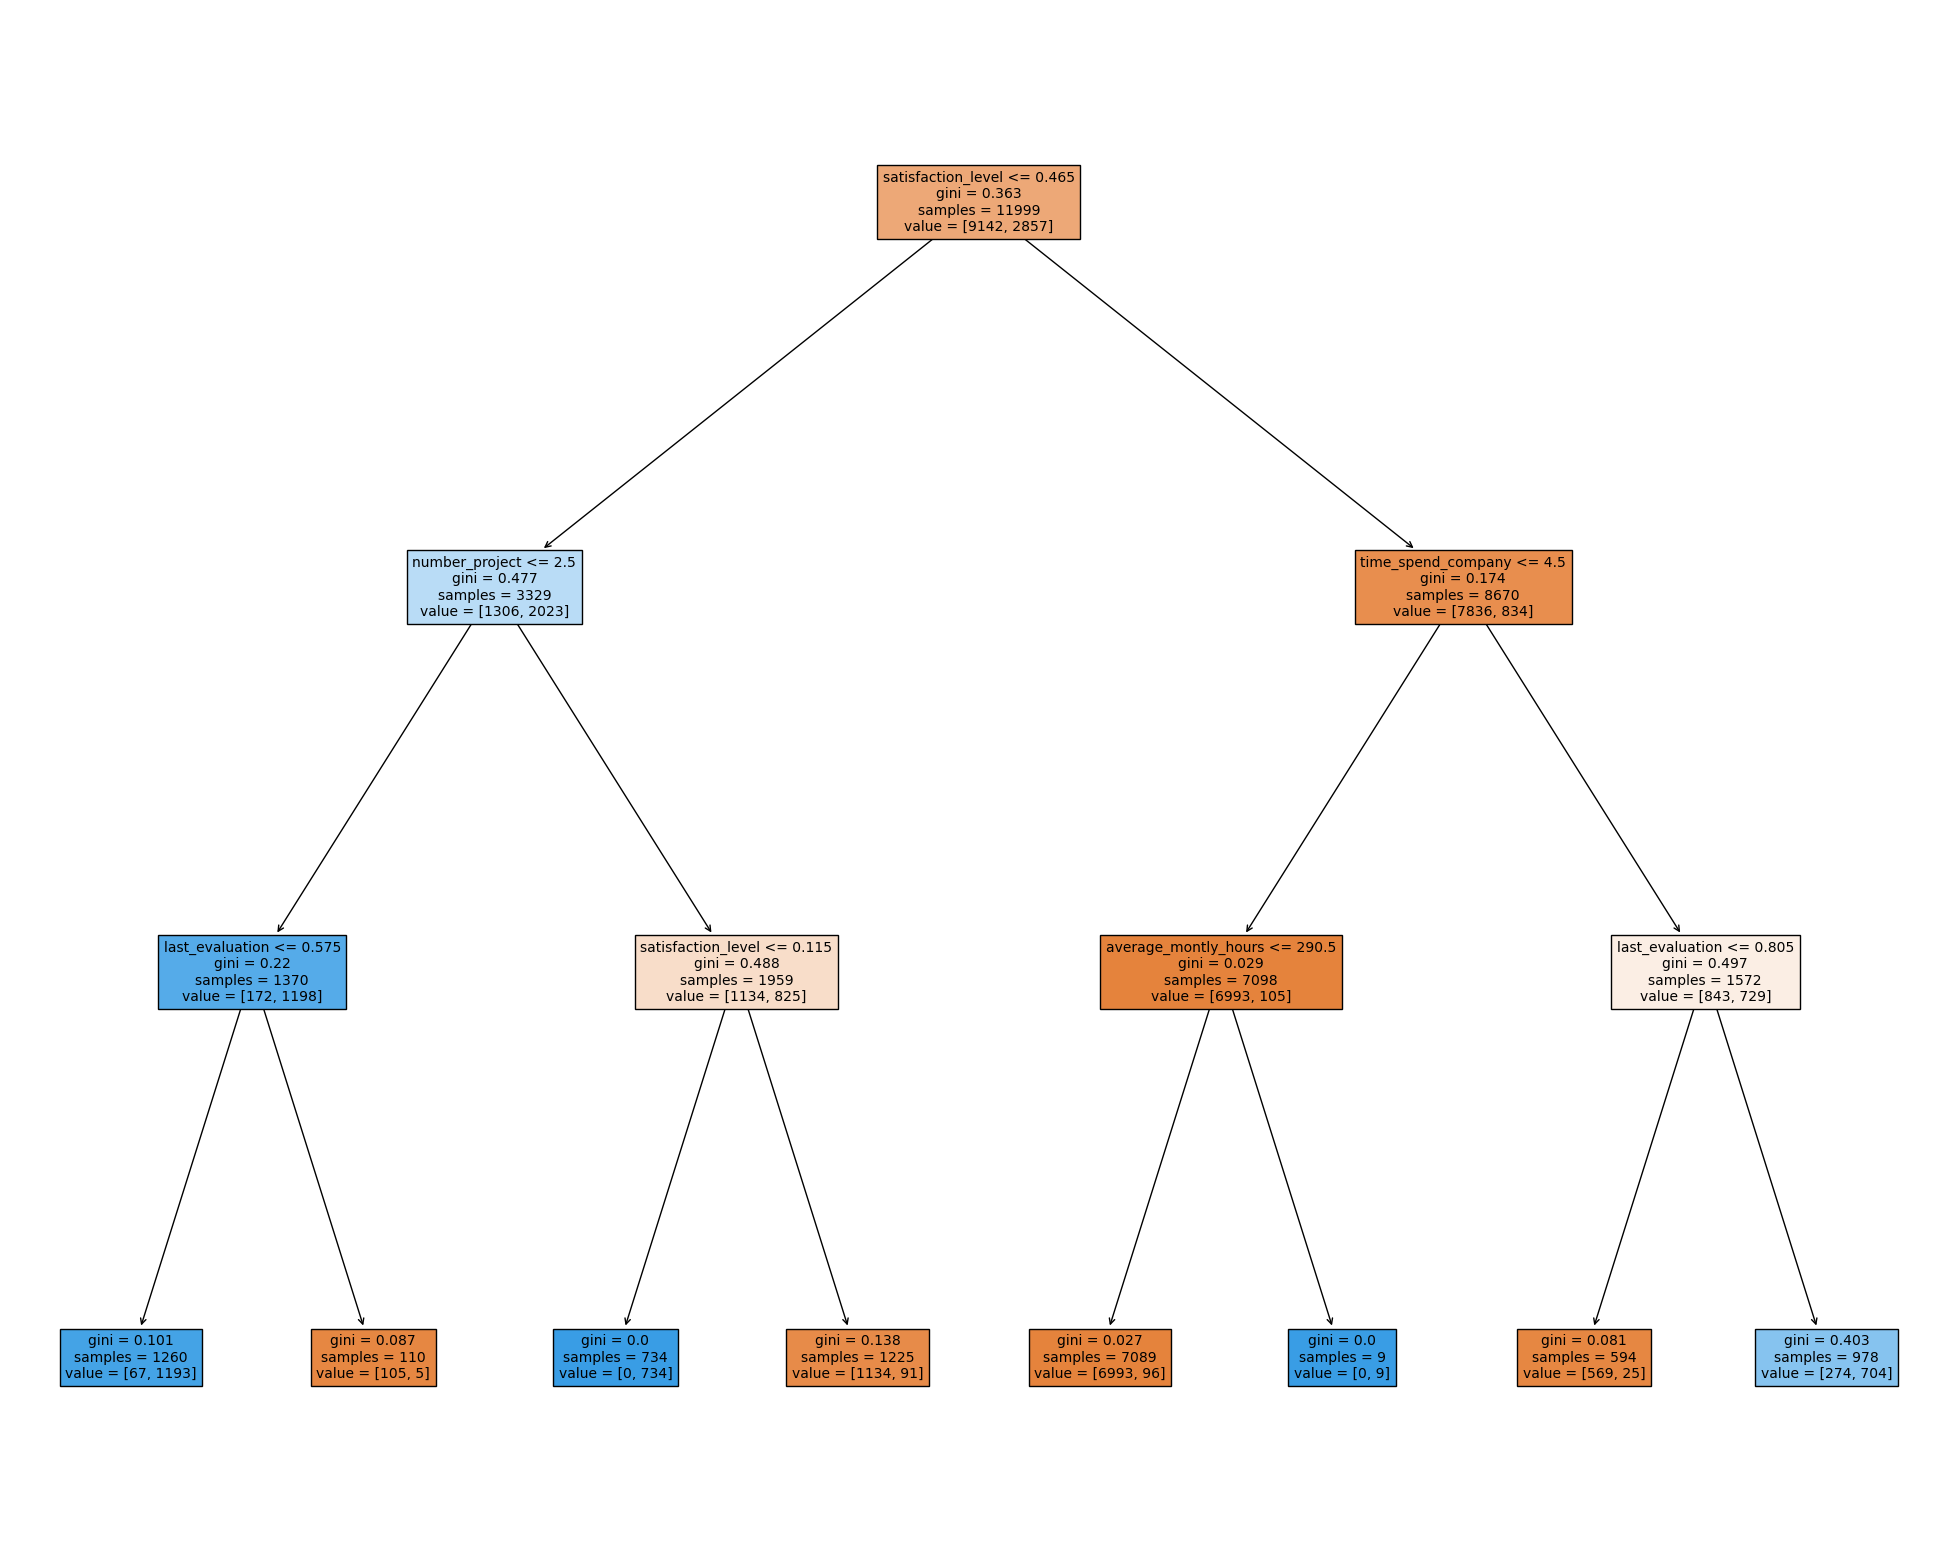

In [15]:
## defining input and target variables
x = turnover.drop(columns = ['left'], axis = 1)
y = turnover['left']

## splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y)

## building Decision tree
tree_md = DecisionTreeClassifier(max_depth = 3).fit(x_train, y_train)

## plotting the decision tree
fig = plt.figure(figsize = (25, 20))
plot_tree(tree_md, feature_names = x_train.columns, filled = True)

In [25]:
## Engineering Features from the decision tree model
turnover['interaction_1'] = np.where(((turnover['satisfaction_level'] >= 0.115) &
                                      (turnover['satisfaction_level'] <= 0.465) &
                                      (turnover['number_project'] > 2.5)), 1, 0)
                              
turnover['interaction_2'] = np.where(((turnover['satisfaction_level'] <= 0.465) &
                                      (turnover['satisfaction_level'] <= 2.5) &
                                      (turnover['number_project'] <= 0.575)), 1, 0)

turnover['interaction_3'] = np.where(((turnover['satisfaction_level'] > 0.465) &
                                      (turnover['time_spend_company'] <= 0.45) &
                                      (turnover['average_montly_hours'] <= 290.5)), 1, 0)

In [32]:
turnover.tail(60)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,interaction_1,interaction_2,interaction_3
14939,0.85,0.87,4,273,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14940,0.10,0.78,5,285,4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14941,0.43,0.49,2,131,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
14942,0.20,0.50,5,135,6,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
14943,0.81,0.92,5,239,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
14944,0.83,0.85,5,237,5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
14945,0.14,0.75,4,277,5,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
14946,0.10,0.84,5,303,5,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
14947,0.91,0.98,4,242,6,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
14948,0.37,0.57,2,158,3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0


I can't find any error in my code, but I am not getting any 1s for interaction 2 or 3 variables. I am not sure what I should do to resolve this.
